In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [23]:
df.shape

(20640, 10)

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

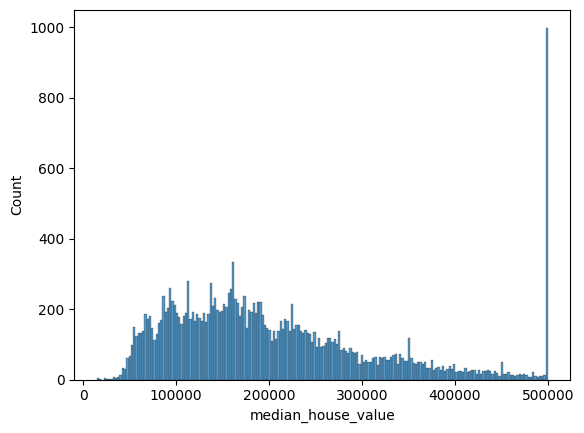

In [28]:
sns.histplot(df['median_house_value'], bins=200)

In [ ]:
df_clean = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
]]
df_clean.head()

In [ ]:
df_clean.shape

In [ ]:
column_with_nan = df_clean.isna().any().loc[lambda x: x].index.tolist()[0]
column_with_nan

In [ ]:
num_missing = df_clean[column_with_nan].isna().sum()
num_missing

In [ ]:
df_clean['population'].median()

In [31]:
n, _ = df_clean.shape
np.random.seed(42)
n_test = int(n * 0.2)
n_validate = int(n * 0.2)
n_train = n - n_test - n_validate
n

20640

In [33]:
n_test, n_validate, n_train, n_test + n_validate + n_train

(4128, 4128, 12384, 20640)

In [34]:
idx =np.arange(n)

In [35]:
np.random.shuffle(idx)

In [37]:
df_train = df_clean.iloc[idx[:n_train]]
df_test = df_clean.iloc[idx[n_train+n_validate:]]
df_val = df_clean.iloc[idx[n_train:n_train+n_validate]]

In [39]:
df_train.head()

latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
20046     36.06    -119.01                25.0       1505.0             NaN   
3024      35.14    -119.46                30.0       2943.0             NaN   
15663     37.80    -122.44                52.0       3830.0             NaN   
20484     34.28    -118.72                17.0       3051.0             NaN   
9814      36.62    -121.93                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  
20046      1392.0       359.0         1.6812             47700.0  
3024       1565.0       584.0         2.5313             45800.0  
15663      1310.0       963.0         3.4801            500001.0  
20484      1705.0       495.0         5.7376            218600.0  
9814       1063.0       428.0         3.7250            278000.0

In [40]:
df_test.head()

latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
9221      37.13    -120.26                33.0       1239.0           250.0   
10234     33.86    -117.91                26.0       2296.0           570.0   
4763      34.04    -118.36                48.0       1769.0           429.0   
9062      34.69    -118.15                32.0       1300.0           234.0   
1874      38.93    -119.97                24.0        856.0           185.0   

       population  households  median_income  median_house_value  
9221        648.0       227.0         2.0278             58800.0  
10234      1415.0       527.0         2.4732            165800.0  
4763        993.0       405.0         2.3214            139400.0  
9062        712.0       249.0         3.2500            107500.0  
1874        388.0       108.0         3.1806            107200.0

In [41]:
df_val.head()

latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
19660     37.51    -120.85                15.0       1131.0           285.0   
4415      34.09    -118.25                52.0       1866.0           470.0   
18113     37.31    -122.02                34.0       2629.0           433.0   
17673     37.30    -121.88                16.0       2692.0           749.0   
16992     37.56    -122.27                17.0       3211.0           847.0   

       population  households  median_income  median_house_value  
19660       728.0       281.0         1.5531             93100.0  
4415       1211.0       417.0         2.9350            189400.0  
18113      1301.0       431.0         6.0830            341400.0  
17673      1674.0       681.0         2.6763            191100.0  
16992      1553.0       812.0         4.9434            292100.0

In [1]:
from hashlib import sha1


def compute_hash(email):
    return sha1(email.encode('utf-8')).hexdigest()


def compute_certificate_id(email):
    email_clean = email.lower().strip()
    return compute_hash(email_clean + '_')

In [2]:
cohort = 2022
course = 'mlops-zoomcamp'
your_id = compute_certificate_id('neimv.zatara@gmail.com')
url = f"https://certificate.datatalks.club/{course}/{cohort}/{your_id}.pdf"
print(url)

https://certificate.datatalks.club/mlops-zoomcamp/2022/5848409839b164c35764834a1cf79bf51f301c25.pdf
